<a href="https://colab.research.google.com/github/KunalSharma2001/Wallmart-Sales-Forecasting/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# importing packages for calculaions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from zipfile import ZipFile
import seaborn as sns
from datetime import datetime

In [46]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
feature_df = pd.read_csv('/content/features.csv')
store_df = pd.read_csv('/content/stores.csv')

In [47]:
# train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In the train Dataset, we have 5 Columns and 421570 Rows.

In [48]:
print(feature_df.head())
print('\n')
feature_df.info()

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        N

There are 12 columns, and 8190 non-null rows.

In [49]:
# store_df.head()
store_df.info()
print('\n')
print(store_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [50]:
# Merging all the datasets into one dataset called final_df
data = train_df.merge(feature_df, on=['Store', 'Date', 'IsHoliday'], how = 'inner')
final_df = data.merge(store_df, on = ['Store'], how='inner')
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [51]:
final_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


<Axes: >

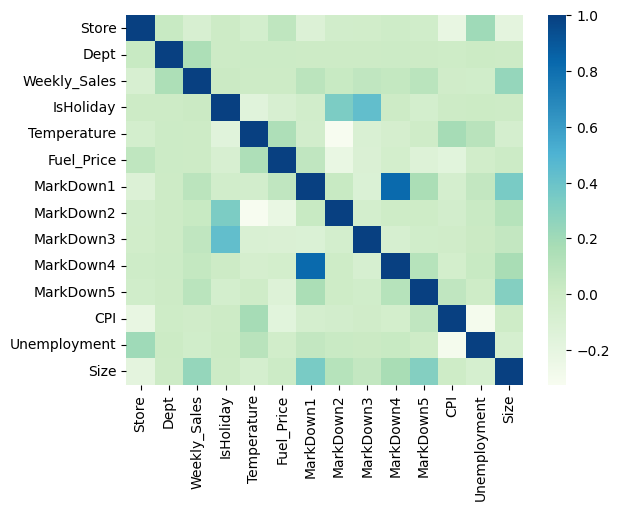

In [52]:
sns.heatmap(final_df.corr(), cmap = 'GnBu')

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [54]:
print("Entries befor applying merge operation in store_df ", store_df.shape[0], "\nfeature_df: ", feature_df.shape[0], '\ntrain_df: ', train_df.shape[0])
print("Entries after Merge operation: ", final_df.shape[0])

Entries befor applying merge operation in store_df  45 
feature_df:  8190 
train_df:  421570
Entries after Merge operation:  421570


In [55]:
#  final_df["Date"] = pd.datetime(final_df["Date"], dayfirst=True)
final_df["Date"] = pd.to_datetime(final_df["Date"], dayfirst=True)

<Axes: >

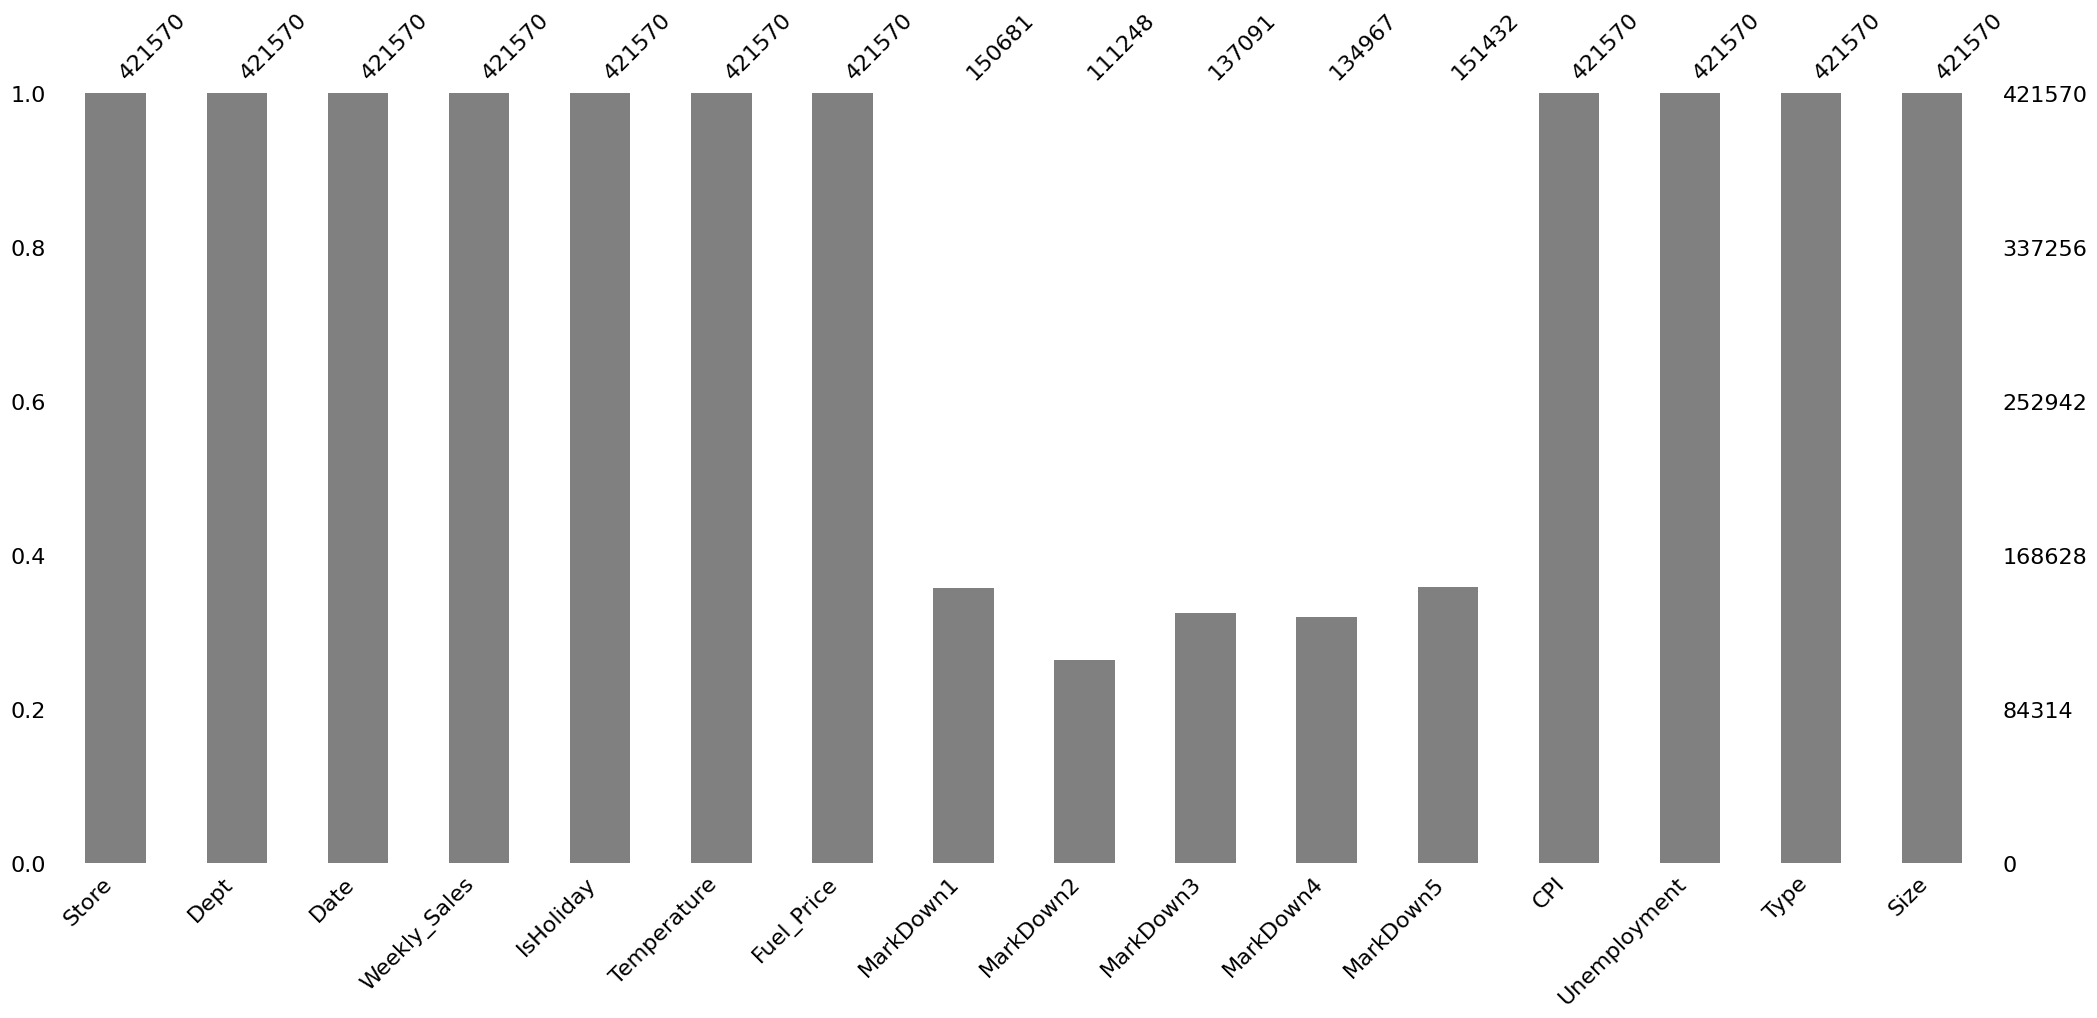

In [56]:
#msno.bar(final_df)
msno.bar(final_df, color='grey')
# we use missingno python package to visualize a data's missing values

In [57]:
final_df.isnull().mean().round(2)

Store           0.00
Dept            0.00
Date            0.00
Weekly_Sales    0.00
IsHoliday       0.00
Temperature     0.00
Fuel_Price      0.00
MarkDown1       0.64
MarkDown2       0.74
MarkDown3       0.67
MarkDown4       0.68
MarkDown5       0.64
CPI             0.00
Unemployment    0.00
Type            0.00
Size            0.00
dtype: float64

### Makrdown
~  A markdown is a devaluation of a product based upon its inability to be sold at the original planned selling price. An example of a markdown would be if you had a sweater for sale that was originally priced at USD 100 and after one month of slow sales, you decide to markdown the sweater  to 20% off, making it USD 80 at retail.

### Discount
~   A markdown is a devaluation of a product based upon its inability to be sold at the original planned selling price. An example of a markdown would be if you had a sweater for sale that was originally priced at USD 100 and after one month of slow sales, you decide to markdown the sweater  to 20% off, making it USD 80 at retail.

In [58]:
final_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [59]:
final_df['Year'] = final_df["Date"].dt.year
final_df['Month'] = final_df["Date"].dt.month
final_df['Week'] = final_df["Date"].dt.week
final_df["Day"] = final_df["Date"].dt.day_name()
final_df['Month_Name'] = final_df["Date"].dt.month_name()

<ipython-input-59-b1d94250b6df>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [60]:
final_df.to_csv("wallmart_EDA.csv", index=False)

In [61]:
final_df['Year'].unique()

array([2010, 2011, 2012])

In [62]:
# Sales By Week
week_sale_2010 = final_df[final_df['Year'] == 2010].groupby('Week')['Weekly_Sales'].mean()
week_sale_2011 = final_df[final_df['Year'] == 2011].groupby('Week')['Weekly_Sales'].mean()
week_sale_2012 = final_df[final_df['Year'] == 2012].groupby('Week')['Weekly_Sales'].mean()
# print("For 2010: ", week_sale_2010, "\nFor 2012: ", week_sale_2011, "\nFor 2012: ", week_sale_2012)

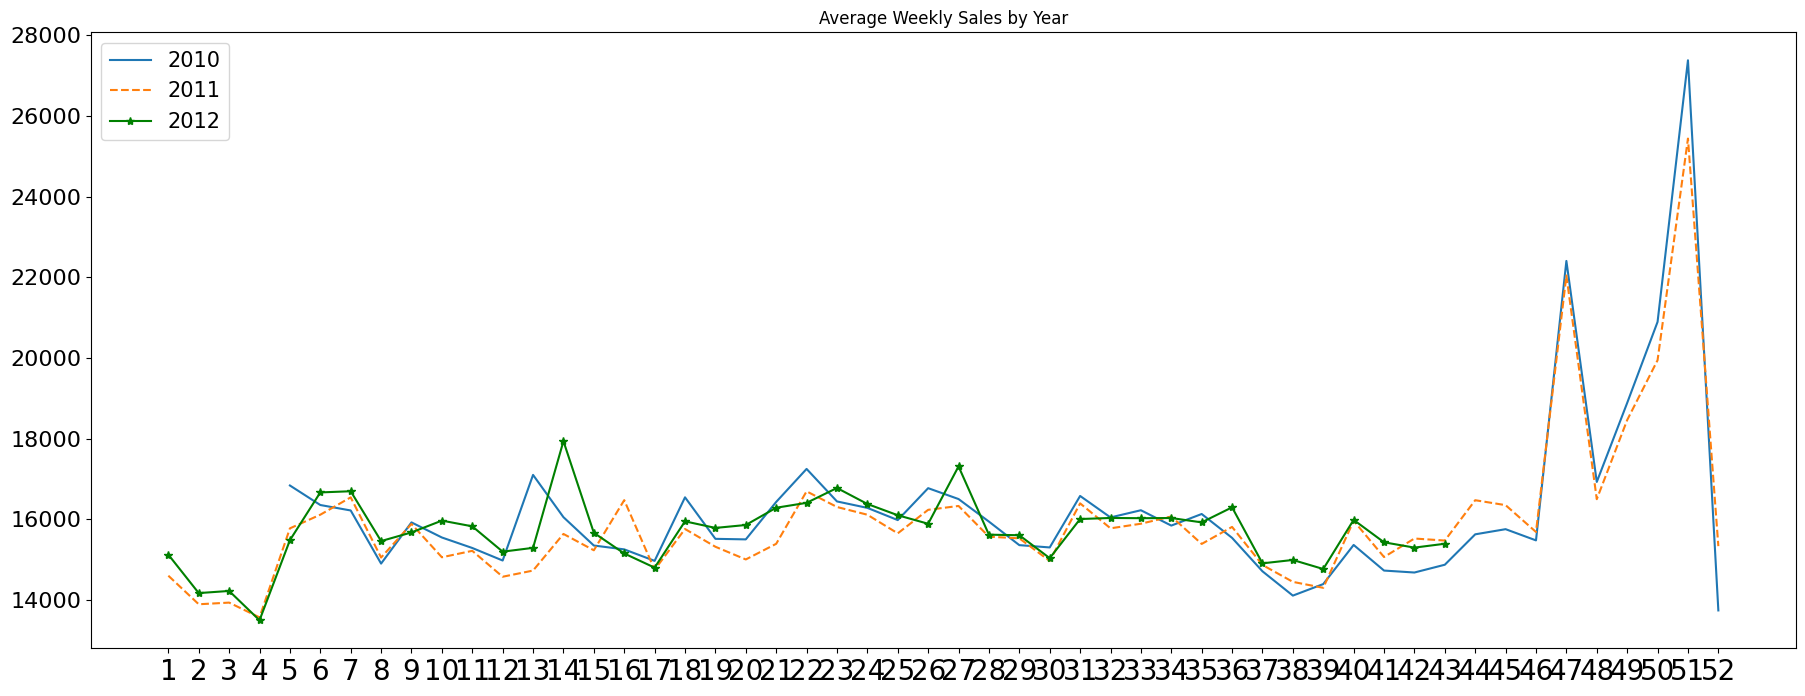

In [63]:
plt.figure(figsize=(22, 8))
plt.plot(week_sale_2010.index, week_sale_2010.values)
plt.plot(week_sale_2011.index, week_sale_2011.values, '--')
plt.plot(week_sale_2012.index, week_sale_2012.values, '*-g')

# putting the values in the x-axis
plt.xticks(np.arange(1, 53, step=1), fontsize=20)
plt.yticks(fontsize=16)


plt.title("Average Weekly Sales by Year")
plt.legend(['2010', '2011', '2012'], fontsize = 15)

In [64]:
import plotly.express as px
import plotly.graph_objects as go

In [65]:
b_store = final_df[final_df['Store'].isin([20, 4, 14, 13, 2])]
fig = px.box(b_store, y='Weekly_Sales', x='Store', color="Store",
             title="Top 5 Store Distribution Analysis",
             template = 'plotly+presentation',
             color_discrete_sequence = px.colors.qualitative.Set1)

In [66]:
fig.update_layout(
    title = {
        'y':0.92, 'x':0.5},
    legend = {
        'y':0.85,
        'x':0.85,
        'xanchor':'right',
        'yanchor':'top'},
    yaxis_title = 'Sales',
    xaxis_title = 'Stores',
    showlegend = True,
    xaxis = dict(type ='category')
)

fig.update_xaxes(categoryorder = 'total descending')
fig.show()

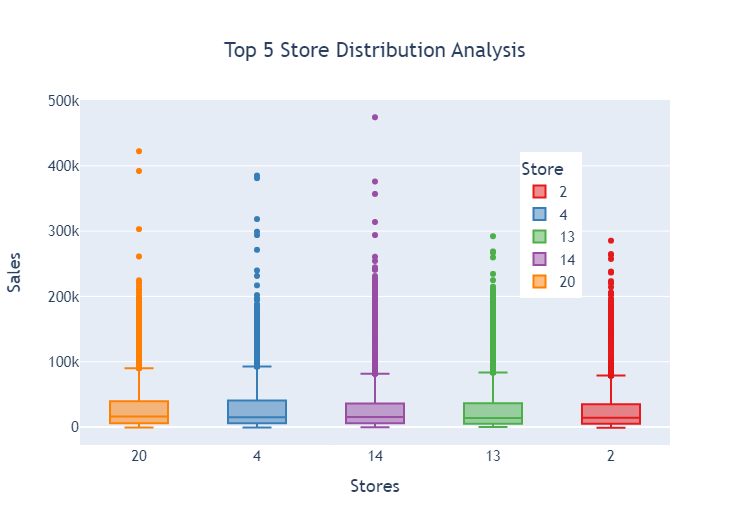

In [68]:
# Analysing the Holidays
holiday = {36 : "Labor Day", 51 : "Christmas", 6 : "Super Bowl", 47 : "Thanks Giving"}

In [71]:
holiday = final_df[final_df["Week"].isin([6,36,47,51])]
holiday_mean = holiday[["Weekly_Sales", "Week"]].groupby("Week").mean().reset_index().sort_values('Weekly_Sales', ascending=False)

In [73]:
holiday_mean = holiday_mean.rename(columns={"Week":"Holiday"})
holiday_mean["Holiday"] = holiday_mean["Holiday"].map(holiday)

ValueError: ignored